## Análisis bases publicas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   
import seaborn as sns  

In [4]:
df = pd.read_csv('Archivos_higienizados/Higienizado_20240207.csv') 

Contacto general por toque

In [5]:
df.columns

Index(['Connid', 'Fecha', 'DN', 'Intento', 'Id unico', 'Username', 'Agente',
       'Tipo_base', 'Calificacion', 'Tipificacion', 'SubTipificacion'],
      dtype='object')

C:\Users\alexa\AppData\Local\Temp\ipykernel_22692\3899529791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Calificacion'].fillna('NO CALIFICADO', inplace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Intento                  1       2
Calificacion                      
CONTACTO EFECTIVO   10.78%   7.96%


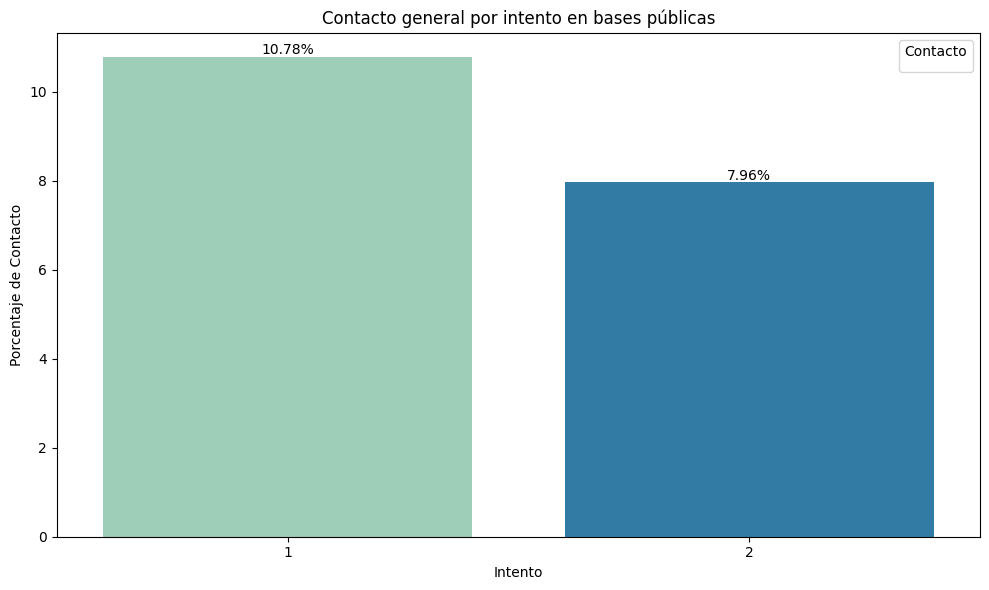

In [6]:
df_2 = df[df['Tipo_base']== 'Publico']
df_2['Calificacion'].fillna('NO CALIFICADO', inplace=True)
contactO_efectivo= df_2[df_2['Calificacion']== 'CONTACTO EFECTIVO']
pivot_table_intentos = pd.pivot_table(df_2[df_2['Intento']!= 0], values='Connid', index='Calificacion', columns='Intento', aggfunc='count', fill_value=0, dropna=False)
total_llamadas_intento = pivot_table_intentos.sum(axis=0)
pivot_table_porcentajes = pd.pivot_table(contactO_efectivo, 
                                         values='Connid', 
                                         index='Calificacion', 
                                         columns='Intento', 
                                         aggfunc='count', fill_value=0)
porcentaje_intentos = (pivot_table_porcentajes/total_llamadas_intento)*100
porcents_filtred = porcentaje_intentos[porcentaje_intentos.index.get_level_values('Calificacion') != 'NO CALIFICADO']
por_format = porcents_filtred.applymap(lambda x: f'{x: .2f}%')
print(por_format)


# Crear una gráfica de barras usando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=porcents_filtred, palette="YlGnBu")

# Agregar etiquetas de texto a las barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                  xytext=(0, 5),
                textcoords='offset points')

# Configurar detalles de la gráfica
plt.title('Contacto general por intento en bases públicas')
plt.xlabel('Intento')
plt.ylabel('Porcentaje de Contacto')
plt.xticks(rotation=0)
plt.legend(title='Contacto')

plt.tight_layout()
plt.show()









Distribución de calificaciones por tipo de calificacion

Intento             1        2
Tipificacion                  
NO EFECTIVO    40.10%   44.11%
NO PAGO        48.63%   47.76%
PAGO           11.26%    8.13%


Text(95.72222222222221, 0.5, 'Tipificacion')

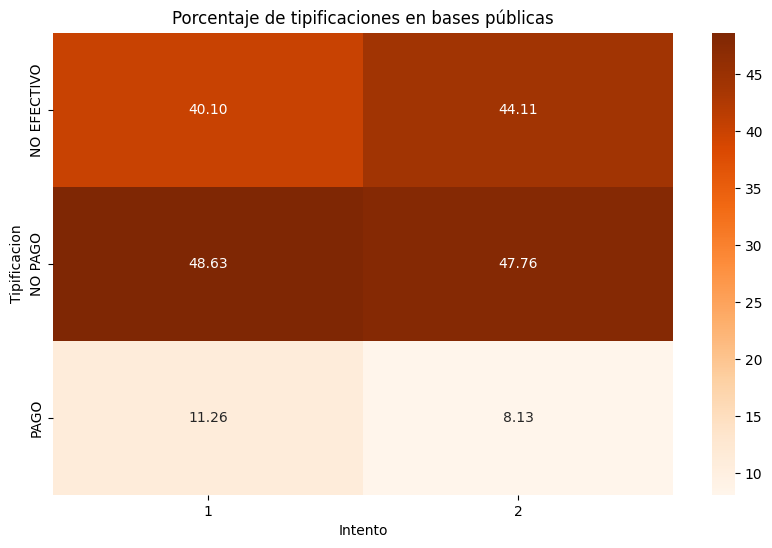

In [7]:
pivot_table_tipificaciones = pd.pivot_table(contactO_efectivo, values='Connid', index='Tipificacion', columns='Intento', aggfunc='count', fill_value=0 )
total_llamadas_intento_2 = pivot_table_tipificaciones.sum()
porcentaje_tipificaciones = (pivot_table_tipificaciones / total_llamadas_intento_2)*100
por_format_2 = porcentaje_tipificaciones.applymap(lambda x: f'{x: .2f}%')
print(por_format_2)
plt.figure(figsize=(10,6))
sns.heatmap(porcentaje_tipificaciones, annot=True, fmt=".2f", cmap="Oranges")
plt.title('Porcentaje de tipificaciones en bases públicas')
plt.xlabel('Intento')
plt.ylabel('Tipificacion')

Distribución por grupo NO EFECTIVO

Intento                  1        2
SubTipificacion                    
CONTESTA Y CUELGA   73.62%   71.43%
FALLECIDO            0.00%    0.38%
ILOCALIZABLE         8.09%    6.39%
NUMERO EQUIVOCADO   18.30%   21.80%


Text(50.7222222222222, 0.5, 'Subtipificacion')

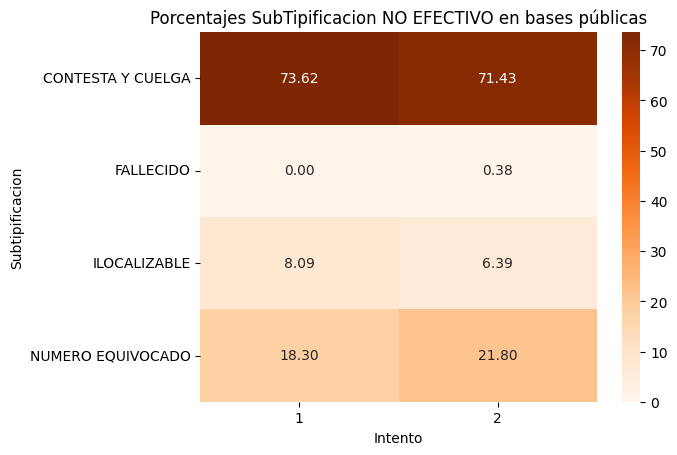

In [8]:
no_efectivo = df_2[df_2['Tipificacion']== 'NO EFECTIVO']
pivot_table_subtipificaciones = pd.pivot_table(no_efectivo, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_3 = pivot_table_subtipificaciones.sum()
porcen_subtipificaciones = (pivot_table_subtipificaciones/total_llamadas_intento_3)*100
por_format_3 = porcen_subtipificaciones.applymap(lambda x: f'{x: .2f}%')
print(por_format_3)
plt.title('Porcentajes SubTipificacion NO EFECTIVO en bases públicas')
sns.heatmap(porcen_subtipificaciones, annot=True, fmt=".2f", cmap='Oranges')
plt.xlabel('Intento')
plt.ylabel('Subtipificacion')

Distribución por grupo NO PAGO

Intento                                                   1        2
SubTipificacion                                                     
ASEGURADO INDICA NO HABER ADQUIRIDO ALGUNA PÓLIZA     0.00%    0.69%
ASEGURADO INDICA NO TENER DINERO                      0.70%    2.08%
ASEGURADO INDICA QUE SU PÓLIZA YA ESTÁ EN PROCE...    2.81%    0.69%
ASEGURADO NO DESEA SEGUIR CON LA PÓLIZA              10.53%    7.64%
ASEGURADO NO PASÓ LOS CANDADOS DE SEGURIDAD           1.05%    0.00%
ASEGURADO NO QUISO PROPORCIONAR CANDADOS DE SEG...    8.42%    3.82%
ASEGURADO NO RECONOCE ADEUDO                          2.46%    1.39%
ASEGURADO SOLICITA HABLAR PRIMERO CON SU AGENTE      13.33%   11.11%
ASEGURADO SOLICITA QUE LE LLAMEMOS DESPUÉS           34.04%   47.92%
LA PERSONA QUE CONTESTA NO DESEA QUE LE VUELVAN...    0.00%    0.69%
NO DESEA PAGAR                                        0.00%    1.04%
POLIZA YA PAGADA AL MOMENTO DE LA LLAMADA             3.86%    3.82%
PÓLIZA CANCELADA POR FALTA DE PAGO

Text(49.722222222222186, 0.5, 'Subtipificacion')

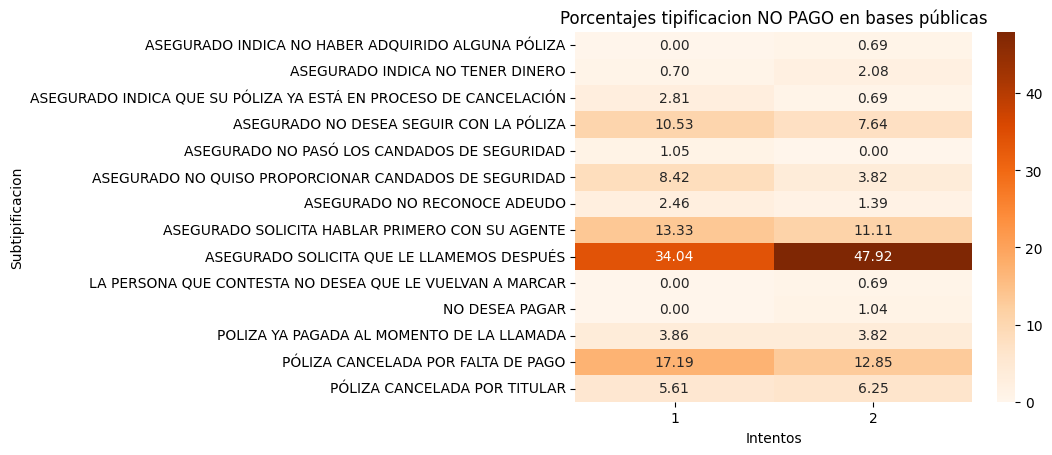

In [9]:
no_pago = df_2[df_2['Tipificacion']== 'NO PAGO']
pivot_table_subtipificaciones_1 = pd.pivot_table(no_pago, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_4 = pivot_table_subtipificaciones_1.sum()
porcen_subtipificaciones_1 = (pivot_table_subtipificaciones_1/total_llamadas_intento_4)*100
por_format_4 = porcen_subtipificaciones_1.applymap(lambda x: f'{x: .2f}%')
print(por_format_4)
plt.title('Porcentajes tipificacion NO PAGO en bases públicas')
sns.heatmap(porcen_subtipificaciones_1, annot=True, fmt=".2f", cmap='Oranges')
plt.xlabel('Intentos')
plt.ylabel('Subtipificacion')

Distribución por grupo PAGO

Intento                                   1        2
SubTipificacion                                     
CAMBIO DE CONDUCTO                    0.00%    2.04%
COBRO EFECTIVO POR IVR                6.06%    4.08%
PROMESA DE PAGO EN BANCO             81.82%   83.67%
PROMESA DE PAGO POR PORTAL METLIFE   12.12%   10.20%


Text(50.7222222222222, 0.5, 'Subtipificacion')

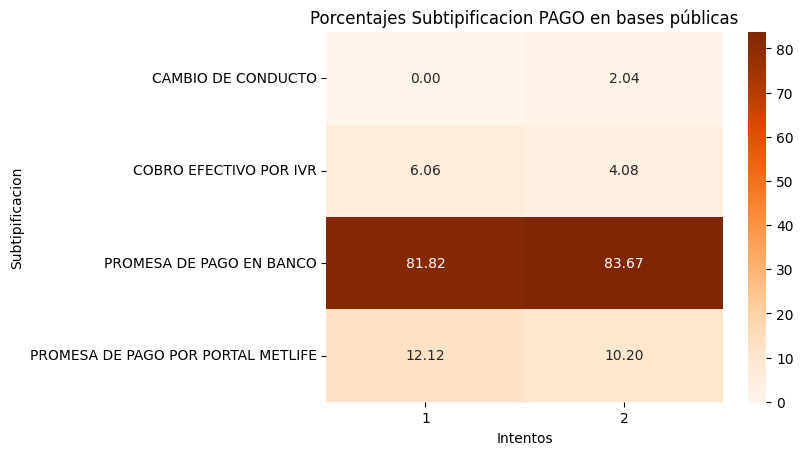

: 

In [10]:
pago = df_2[df_2['Tipificacion']== 'PAGO']
pivot_table_subtipificaciones_2 = pd.pivot_table(pago, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_5 = pivot_table_subtipificaciones_2.sum()
porcen_subtipificaciones_2 = (pivot_table_subtipificaciones_2/total_llamadas_intento_5)*100
por_format_5 = porcen_subtipificaciones_2.applymap(lambda x: f'{x: .2f}%')
print(por_format_5)
plt.title('Porcentajes Subtipificacion PAGO en bases públicas')
sns.heatmap(porcen_subtipificaciones_2, annot=True, fmt='.2f', cmap='Oranges')
plt.xlabel('Intentos')
plt.ylabel('Subtipificacion')